In [84]:
# Installation of libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dset = pd.read_csv("housing.csv")

In [3]:
# Importing california housing price dataset
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
dset.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = dset.drop(['median_house_value'],axis=1)
y = dset['median_house_value']

In [7]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [8]:
#splitting dataset into training and testing segments
split_result = train_test_split(x, y, test_size=0.20)
x_train = split_result[0]
x_test = split_result[1]
y_train = split_result[2]
y_test = split_result[3]

training_data=x_train.join(y_train)

training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1239,-120.27,38.31,13.0,3297.0,662.0,267.0,97.0,3.0750,INLAND,108300.0
2427,-119.49,36.58,21.0,2106.0,410.0,867.0,380.0,1.9913,INLAND,95300.0
18430,-121.87,37.26,24.0,2383.0,343.0,1146.0,341.0,5.6223,<1H OCEAN,265700.0
6931,-118.08,34.01,33.0,1091.0,233.0,890.0,226.0,2.7679,<1H OCEAN,176400.0
7675,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,<1H OCEAN,167400.0
...,...,...,...,...,...,...,...,...,...,...
3319,-122.85,39.00,20.0,1580.0,318.0,753.0,252.0,1.8704,INLAND,88500.0
9459,-123.50,39.67,22.0,2124.0,450.0,1122.0,446.0,2.1793,INLAND,71500.0
14987,-117.03,32.73,32.0,1750.0,333.0,997.0,335.0,3.4784,NEAR OCEAN,154400.0
15657,-122.41,37.79,52.0,6016.0,2509.0,3436.0,2119.0,2.5166,NEAR BAY,275000.0


In [9]:
# Restructuring dataset to contain only integer features, enabling the use of correlation chart heat maps
training_data_no_oceans = training_data.drop('ocean_proximity', axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

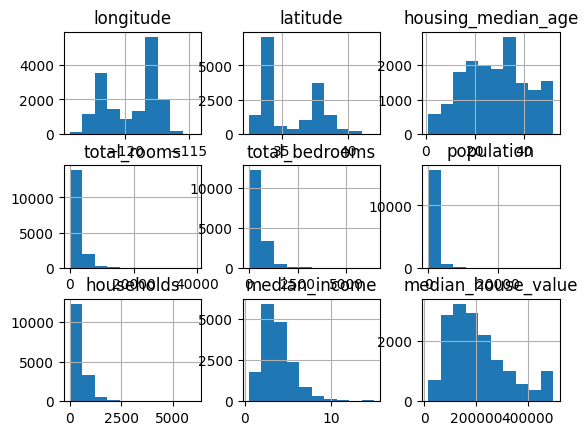

In [10]:
training_data.hist()

<Axes: >

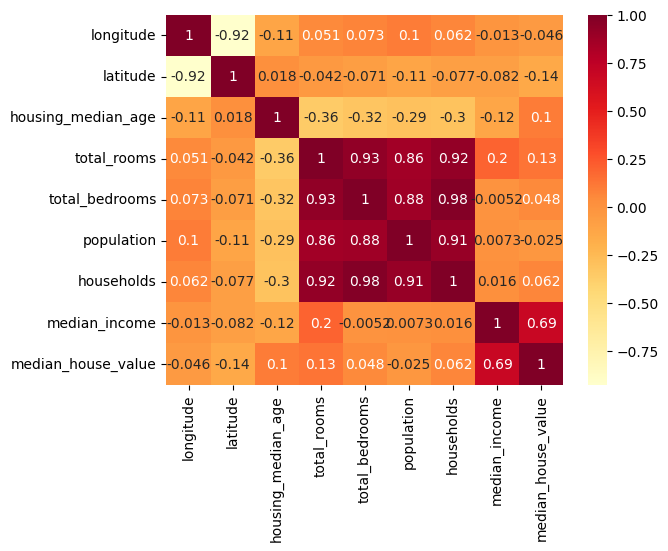

In [11]:
sns.heatmap(training_data_no_oceans.corr(), annot=True, cmap="YlOrRd")

In [12]:
training_data_no_oceans.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924110,-0.113544,0.050597,0.073287,0.104765,0.062092,-0.012874,-0.046210
latitude,-0.924110,1.000000,0.017582,-0.041786,-0.071337,-0.113139,-0.077255,-0.081770,-0.143993
housing_median_age,-0.113544,0.017582,1.000000,-0.359190,-0.319938,-0.293433,-0.302970,-0.120592,0.102511
total_rooms,0.050597,-0.041786,-0.359190,1.000000,0.931639,0.857411,0.920447,0.199242,0.130281
total_bedrooms,0.073287,-0.071337,-0.319938,0.931639,1.000000,0.877926,0.980727,-0.005156,0.048261
population,0.104765,-0.113139,-0.293433,0.857411,0.877926,1.000000,0.906462,0.007258,-0.025301
households,0.062092,-0.077255,-0.302970,0.920447,0.980727,0.906462,1.000000,0.015559,0.062296
median_income,-0.012874,-0.081770,-0.120592,0.199242,-0.005156,0.007258,0.015559,1.000000,0.690597
median_house_value,-0.046210,-0.143993,0.102511,0.130281,0.048261,-0.025301,0.062296,0.690597,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

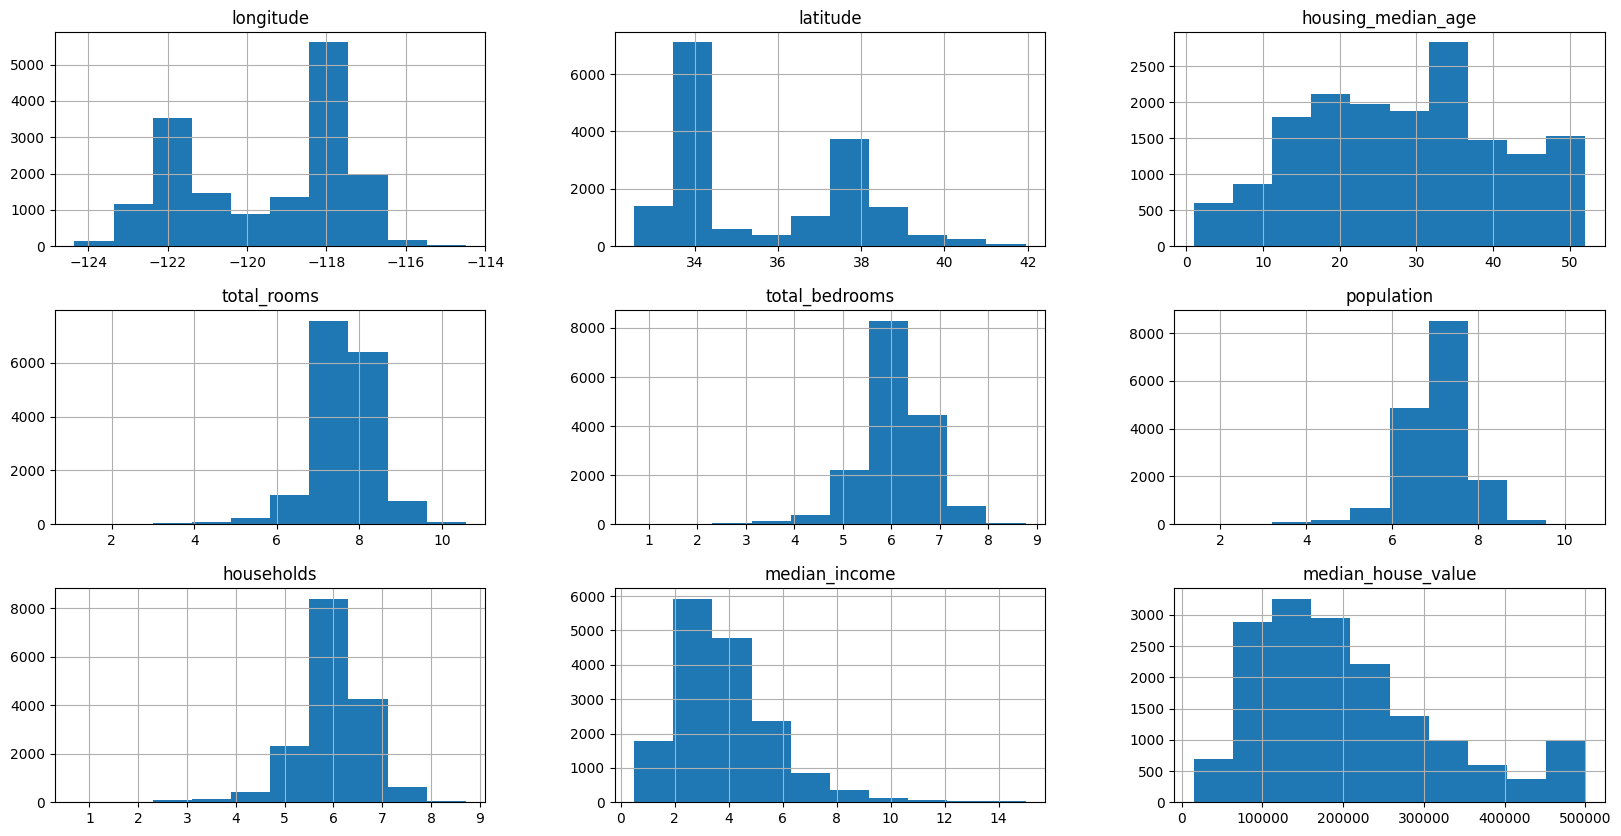

In [13]:
# Scaling the skewed features
training_data['total_bedrooms'] = np.log(1 + training_data['total_bedrooms'])
training_data['total_rooms'] = np.log(1 + training_data['total_rooms'])
training_data['population'] = np.log(1 + training_data["population"])
training_data["households"] = np.log(1 + training_data["households"])

training_data.hist(figsize=(20,10))

<Axes: xlabel='latitude', ylabel='longitude'>

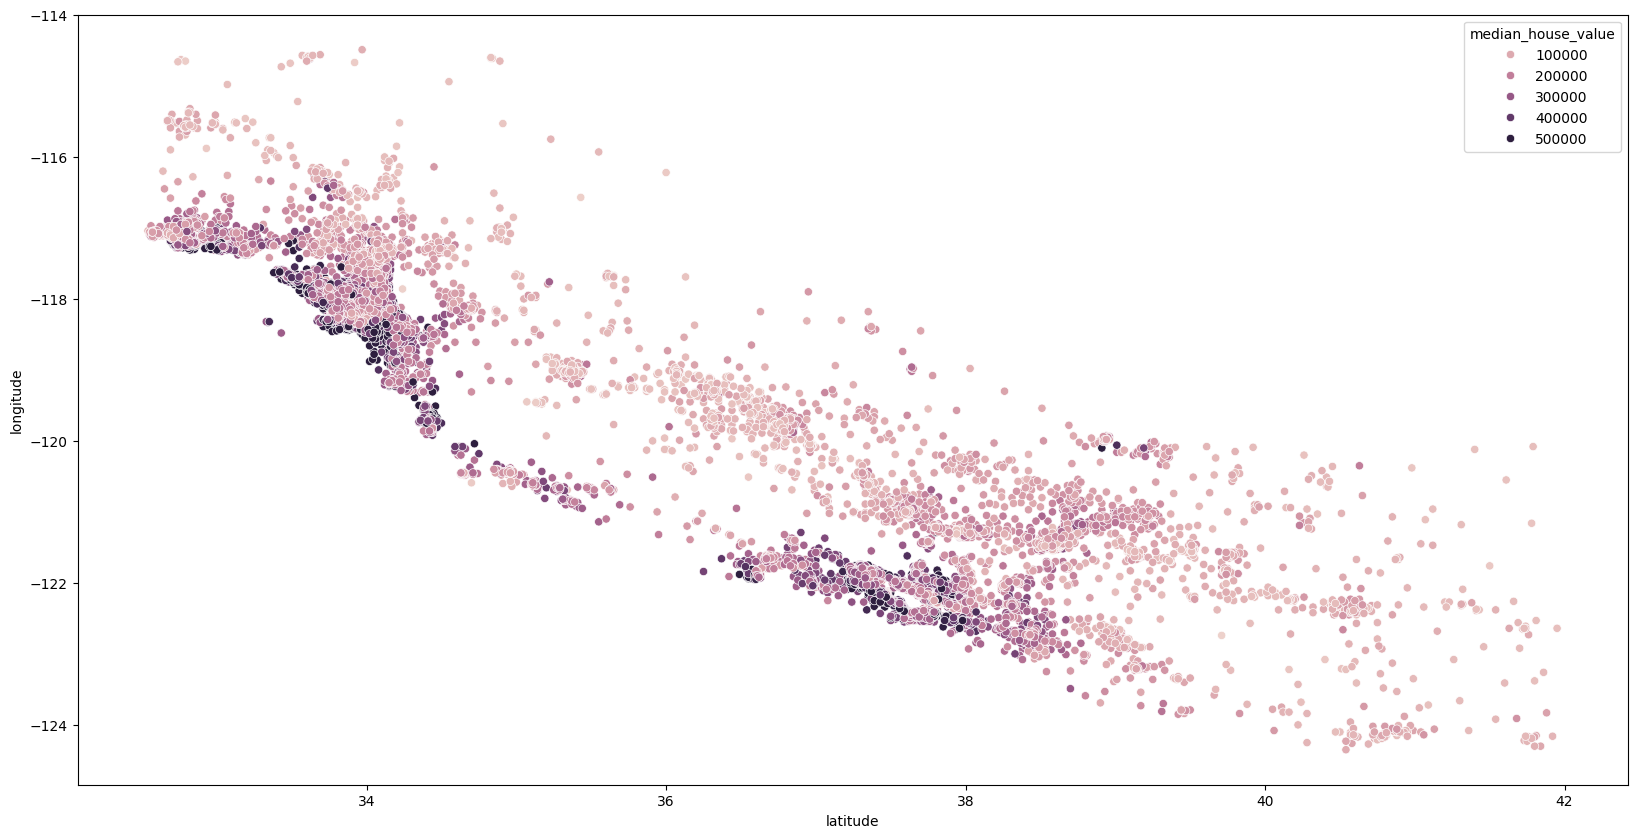

In [14]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value")

In [15]:
training_data_no_oceans = training_data_no_oceans.join(pd.get_dummies(training_data.ocean_proximity))
training_data_no_oceans = training_data_no_oceans.replace({True: 1, False: 0})
training_data = training_data_no_oceans

In [16]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1239,-120.27,38.31,13.0,3297.0,662.0,267.0,97.0,3.0750,108300.0,0,1,0,0,0
2427,-119.49,36.58,21.0,2106.0,410.0,867.0,380.0,1.9913,95300.0,0,1,0,0,0
18430,-121.87,37.26,24.0,2383.0,343.0,1146.0,341.0,5.6223,265700.0,1,0,0,0,0
6931,-118.08,34.01,33.0,1091.0,233.0,890.0,226.0,2.7679,176400.0,1,0,0,0,0
7675,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,167400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,-122.85,39.00,20.0,1580.0,318.0,753.0,252.0,1.8704,88500.0,0,1,0,0,0
9459,-123.50,39.67,22.0,2124.0,450.0,1122.0,446.0,2.1793,71500.0,0,1,0,0,0
14987,-117.03,32.73,32.0,1750.0,333.0,997.0,335.0,3.4784,154400.0,0,0,0,0,1
15657,-122.41,37.79,52.0,6016.0,2509.0,3436.0,2119.0,2.5166,275000.0,0,0,0,1,0


In [17]:
training_data = training_data.drop(['ISLAND'], axis=1)

In [18]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
1239,-120.27,38.31,13.0,3297.0,662.0,267.0,97.0,3.0750,108300.0,0,1,0,0
2427,-119.49,36.58,21.0,2106.0,410.0,867.0,380.0,1.9913,95300.0,0,1,0,0
18430,-121.87,37.26,24.0,2383.0,343.0,1146.0,341.0,5.6223,265700.0,1,0,0,0
6931,-118.08,34.01,33.0,1091.0,233.0,890.0,226.0,2.7679,176400.0,1,0,0,0
7675,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,167400.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,-122.85,39.00,20.0,1580.0,318.0,753.0,252.0,1.8704,88500.0,0,1,0,0
9459,-123.50,39.67,22.0,2124.0,450.0,1122.0,446.0,2.1793,71500.0,0,1,0,0
14987,-117.03,32.73,32.0,1750.0,333.0,997.0,335.0,3.4784,154400.0,0,0,0,1
15657,-122.41,37.79,52.0,6016.0,2509.0,3436.0,2119.0,2.5166,275000.0,0,0,1,0


<Axes: >

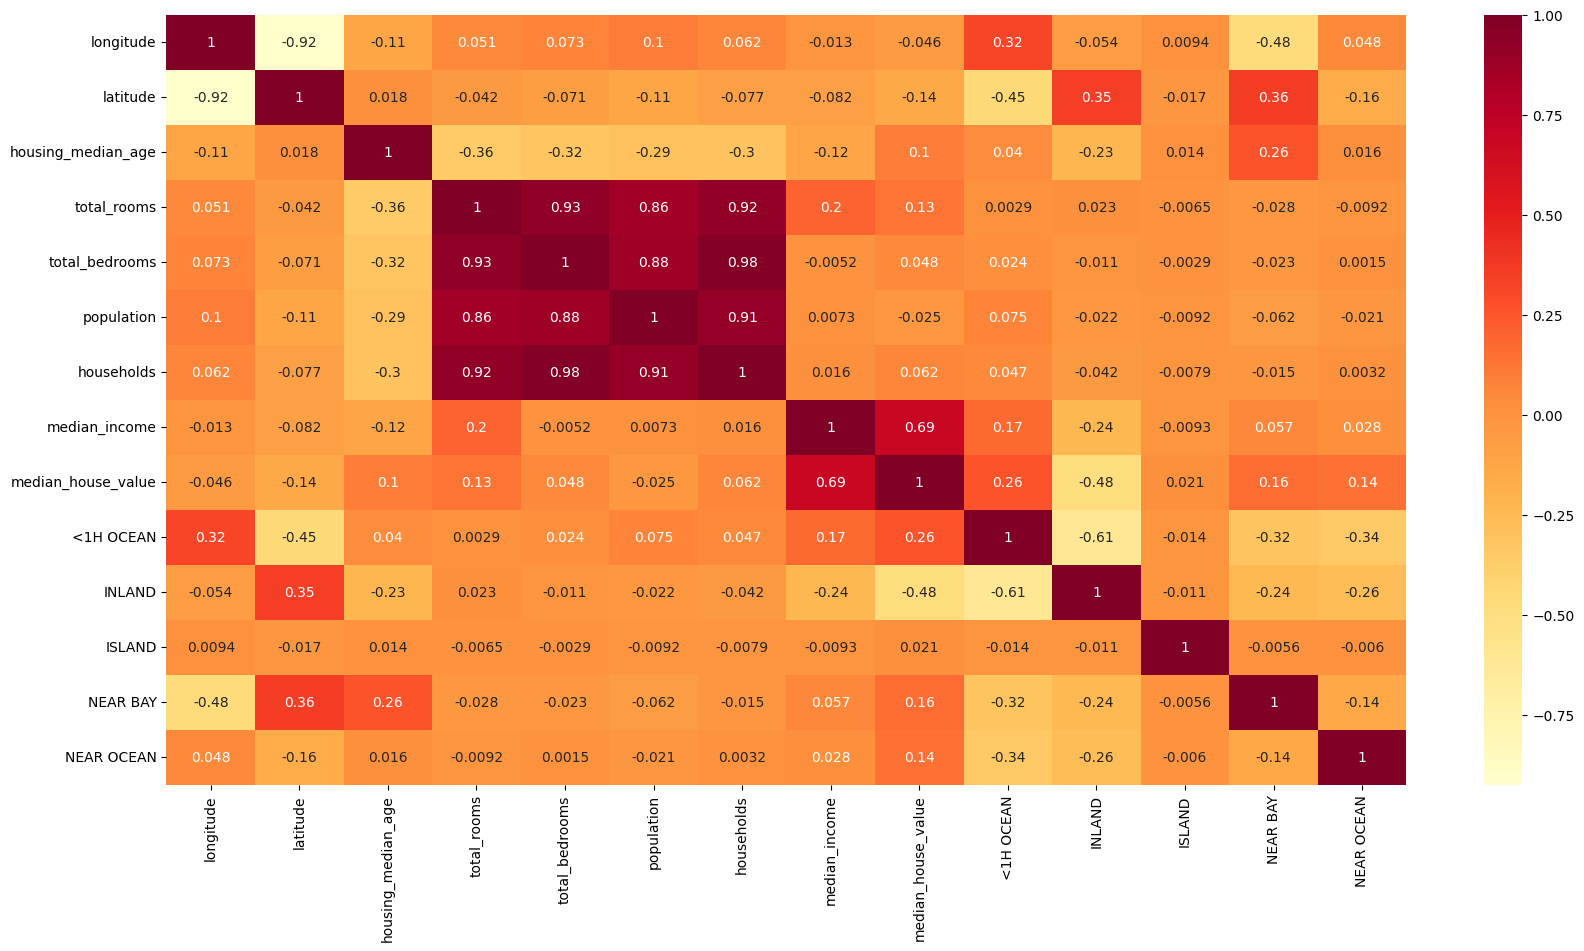

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(training_data_no_oceans.corr(), annot=True, cmap="YlOrRd")

In [21]:
training_data["rooms_per_house"] = training_data["total_rooms"] / training_data["households"]
training_data["bedrooms-per-room"] = training_data["total_bedrooms"] / training_data["total_rooms"]


<Axes: >

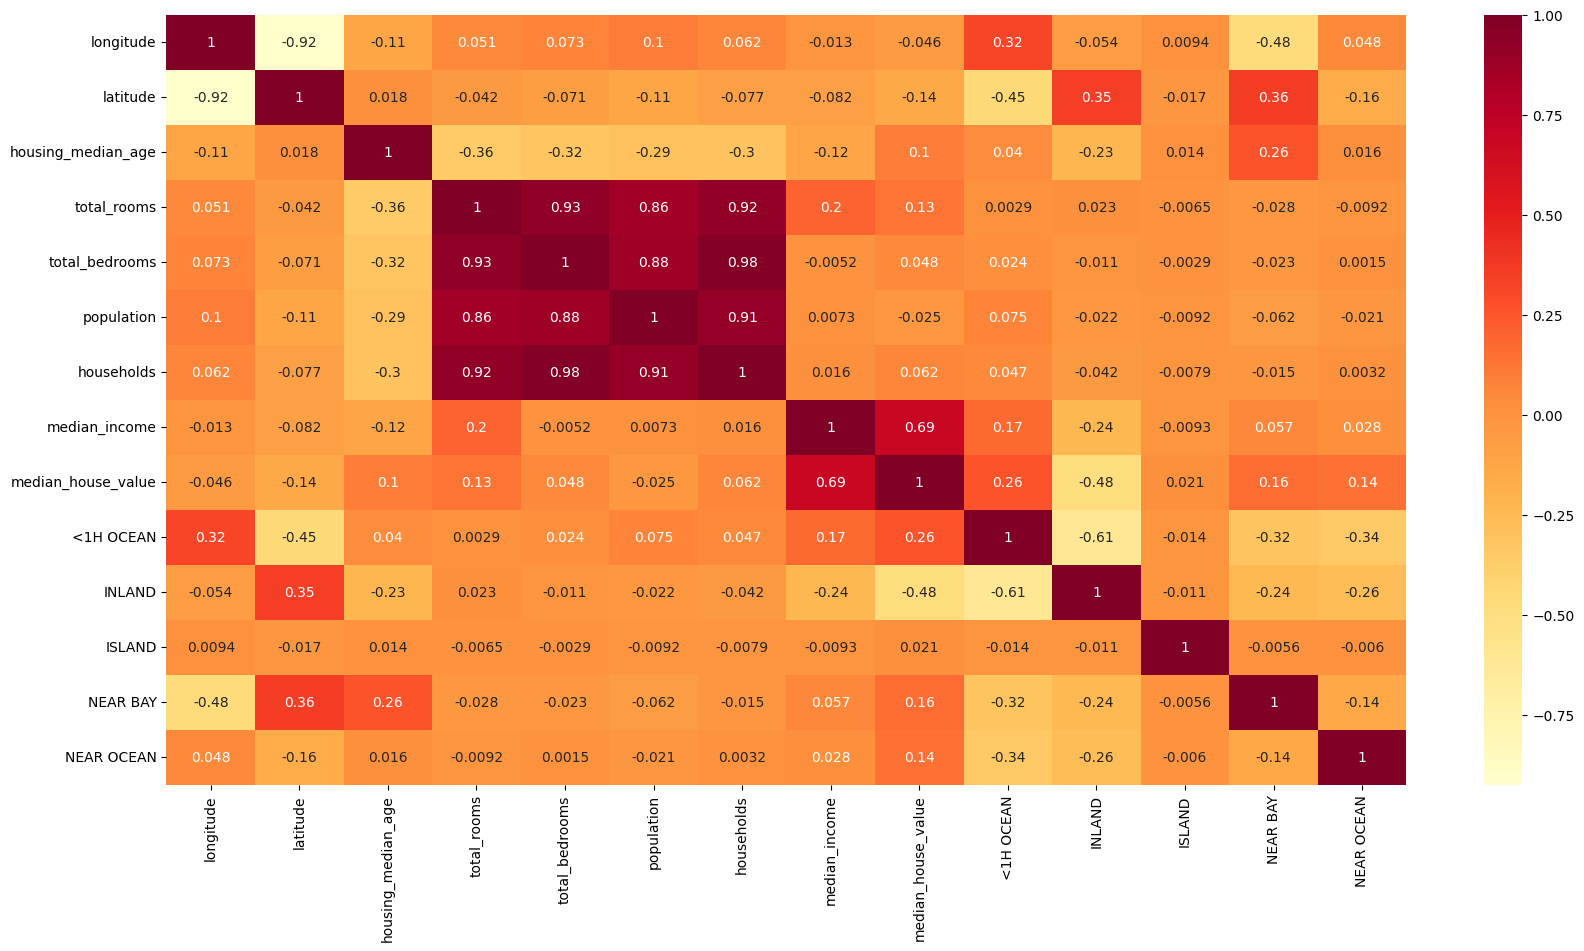

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(training_data_no_oceans.corr(), annot=True, cmap="YlOrRd")

In [25]:
# Scaling the testing data
testing_data=x_test.join(y_test)
testing_data['total_bedrooms'] = np.log(1 + testing_data['total_bedrooms'])
testing_data['total_rooms'] = np.log(1 + testing_data['total_rooms'])
testing_data['population'] = np.log(1 + testing_data["population"])
testing_data["households"] = np.log(1 + testing_data["households"])

testing_data_no_oceans = testing_data.drop('ocean_proximity', axis=1)
testing_data_no_oceans = testing_data_no_oceans.join(pd.get_dummies(testing_data.ocean_proximity))
testing_data_no_oceans = testing_data_no_oceans.replace({True: 1, False: 0})
testing_data = testing_data_no_oceans

# Feature Engineering 
testing_data["rooms_per_house"] = testing_data["total_rooms"] / testing_data["households"]
testing_data["bedrooms-per-room"] = testing_data["total_bedrooms"] / testing_data["total_rooms"]


In [26]:
x_test, y_test = testing_data.drop(['median_house_value'], axis=1), testing_data['median_house_value']

In [29]:
# Feature alignment
x_test = x_test.drop(['ISLAND'], axis=1)

In [77]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
fr = RandomForestRegressor()
fr.fit(scaled_x_train, y_train)


RandomForestRegressor()

In [78]:
#Initial Accuracy Score
fr.score(scaled_x_test, y_test)

0.3973762402642844

In [80]:
# GridSearch and hyperparameter tuning
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}
fr = RandomForestRegressor()
grr = GridSearchCV(fr, hyperparameters, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# Training the random forest regressor
grr.fit(scaled_x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [81]:
grr.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [83]:
# Testing the random forest regressor
grr_best = grr.best_estimator_
grr_best.score(scaled_x_train, y_train)

# Imporved accuracy score

0.9726851540737014